Sequoia Capital invested 48 times in startup's
Accel Partners invested 47 times in startup's
Kalaari Capital invested 41 times in startup's
Indian Angel Network invested 40 times in startup's
Blume Ventures invested 36 times in startup's
Question -3:--


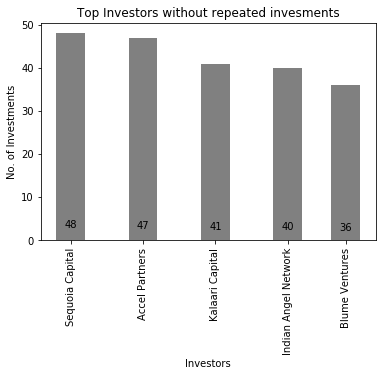

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 


startUpData = pd.read_csv("startup_funding.csv",encoding='utf-8')

##Change the important startUp name to correct name
startUpData['StartupName'] = startUpData['StartupName'].str.replace("Flipkart.com","Flipkart")
startUpData['StartupName'] = startUpData['StartupName'].str.replace("Oyo Rooms","Oyo")
startUpData['StartupName'] = startUpData['StartupName'].str.replace("OyoRooms","Oyo")
startUpData['StartupName'] = startUpData['StartupName'].str.replace("Oyorooms","Oyo")
startUpData['StartupName'] = startUpData['StartupName'].str.replace("OYO Rooms","Oyo")
startUpData['StartupName'] = startUpData['StartupName'].str.replace("Paytm Marketplace","Paytm")
startUpData['StartupName'] = startUpData['StartupName'].str.replace("Ola Cabs","Ola")
startUpData['StartupName'] = startUpData['StartupName'].str.replace("Olacabs","Ola")

##fillna InvestorsName with -- for easy manupulation
startUpData['InvestorsName'].fillna("--",inplace=True)

##Multiple investors for single startup, so i have splited the those as each value
startUpData = startUpData.assign(InvestorsName=startUpData.InvestorsName.str.split(',')).explode('InvestorsName')

startUpData['InvestorsName'] = startUpData['InvestorsName'].str.strip()

investorGroup = startUpData.groupby('InvestorsName')

uniqueInvestorList = startUpData['InvestorsName'].unique()

dictionary = {}
for investor in uniqueInvestorList:
    ##Undisclosed,-- and emnpty values are not fit for manipulation,so removing
    if investor == "--" or investor.startswith('Undisclosed') or investor == "":
        continue
    else:
        groupValue = investorGroup.get_group(investor)
        count = len(groupValue['StartupName'].unique())
        dictionary[investor] = count
        

investorDataFrame = pd.DataFrame(list(dictionary.values()),list(dictionary.keys()))
investorDataFrame = investorDataFrame.sort_values(by=[0],ascending=False)
resultList = investorDataFrame[:5][0]

for index in range(5):
    print(resultList.index[index] + " invested " + str(resultList.values[index]) + " times in startup's")
    
    
x_pos = [10,35,60,85,105]
print("Question -3:--")
react = plt.bar(x_pos, resultList.values,width=10,color="gray")
plt.xticks(x_pos, resultList.index,rotation=90)
plt.ylabel('No. of Investments')
plt.xlabel('Investors')
plt.title('Top Investors without repeated invesments')

for i in react:
    height = i.get_height()
    plt.text(i.get_x()+i.get_width()/2.0,.05*height,str(height),ha='center',va='bottom')

plt.show()    